# Données des présidentielles de 1965 à 2012
## Importation et exploration des données

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/h4r1c0t/WildCodeSchool/master/Project/Datathon%231/Datasets/data_presid_1965-2012.csv',
                index_col=False)
df['Année'] = df['Date'].apply(lambda x: x[:4])
df['Date'] = pd.to_datetime(df['Date'])
df.drop(columns = ['circonscription'], inplace = True)
df = df.groupby(['Date', 'Année', 'Tour', 'département', 'Code département', 'Candidats']).sum().reset_index()
df.set_index(df['Date'], inplace = True)
df.drop(columns = ['Date'], inplace = True)

In [2]:
df.head()

Année  Tour département Code département                Candidats  \
Date                                                                           
1965-12-05  1965   1.0         AIN                1              BARBU (DIV)   
1965-12-05  1965   1.0         AIN                1          DE GAULLE (UNR)   
1965-12-05  1965   1.0         AIN                1           LECANUET (MRP)   
1965-12-05  1965   1.0         AIN                1         MARCILHACY (DVD)   
1965-12-05  1965   1.0         AIN                1  TIXIER-VIGNANCOUR (EXD)   

            Inscrits   Votants  Exprimés  Blancs et nuls    Score  
Date                                                               
1965-12-05  206496.0  166986.0  165555.0          1431.0   2152.0  
1965-12-05  206496.0  166986.0  165555.0          1431.0  71246.0  
1965-12-05  206496.0  166986.0  165555.0          1431.0  30416.0  
1965-12-05  206496.0  166986.0  165555.0          1431.0   3006.0  
1965-12-05  206496.0  166986.0  165555.0          1431.0   8317.0

In [3]:
df.tail()

Année  Tour département Code département                Candidats  \
Date                                                                           
2012-05-06  2012   2.0      VENDEE               85  GISCARD D'ESTAING (UDF)   
2012-05-06  2012   2.0      VIENNE               86  GISCARD D'ESTAING (UDF)   
2012-05-06  2012   2.0      VOSGES               88  GISCARD D'ESTAING (UDF)   
2012-05-06  2012   2.0       YONNE               89  GISCARD D'ESTAING (UDF)   
2012-05-06  2012   2.0    YVELINES               78  GISCARD D'ESTAING (UDF)   

            Inscrits   Votants  Exprimés  Blancs et nuls     Score  
Date                                                                
2012-05-06  335645.0  299830.0  290958.0          8872.0  175698.0  
2012-05-06  259361.0  227486.0  220618.0          6868.0  103729.0  
2012-05-06  271174.0  238054.0  230419.0          7635.0  115611.0  
2012-05-06  216241.0  189198.0  182291.0          6907.0   90965.0  
2012-05-06  710108.0  614109.0  594023.0         20086.0  303503.0

## Calcul du taux de votants et d'abstention

In [4]:
df['Votants (%)'] = round(df['Votants'] / df['Inscrits'] * 100, 2)
df['Abstention (%)'] = 100 - df['Votants (%)']
df_base = df.copy()

In [5]:
df.to_csv('data_presid_1965-2012_taux.csv')

In [6]:
df.head()

Année  Tour département Code département                Candidats  \
Date                                                                           
1965-12-05  1965   1.0         AIN                1              BARBU (DIV)   
1965-12-05  1965   1.0         AIN                1          DE GAULLE (UNR)   
1965-12-05  1965   1.0         AIN                1           LECANUET (MRP)   
1965-12-05  1965   1.0         AIN                1         MARCILHACY (DVD)   
1965-12-05  1965   1.0         AIN                1  TIXIER-VIGNANCOUR (EXD)   

            Inscrits   Votants  Exprimés  Blancs et nuls    Score  \
Date                                                                
1965-12-05  206496.0  166986.0  165555.0          1431.0   2152.0   
1965-12-05  206496.0  166986.0  165555.0          1431.0  71246.0   
1965-12-05  206496.0  166986.0  165555.0          1431.0  30416.0   
1965-12-05  206496.0  166986.0  165555.0          1431.0   3006.0   
1965-12-05  206496.0  166986.0  165555.0          1431.0   8317.0   

            Votants (%)  Abstention (%)  
Date                                     
1965-12-05        80.87           19.13  
1965-12-05        80.87           19.13  
1965-12-05        80.87           19.13  
1965-12-05        80.87           19.13  
1965-12-05        80.87           19.13

### Visualisation des taux
#### Globalité

In [7]:
import matplotlib.pyplot as plt

In [8]:
df_tx_glob = df.groupby(by = ['Année', 'Tour']).mean().reset_index()

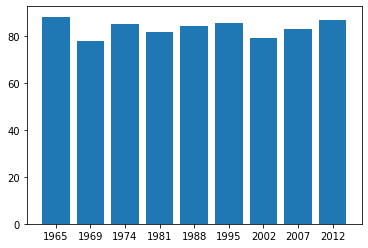

In [9]:
_ = plt.bar('Année', 'Votants (%)', data = df_tx_glob)

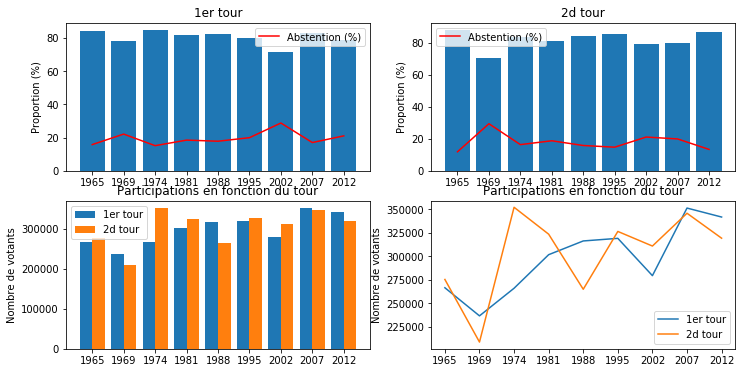

In [10]:
fig = plt.subplots(figsize = (12, 6))
ax1 = plt.subplot(221)
ax1.bar('Année', 'Votants (%)', data = df_tx_glob[df_tx_glob['Tour'] == 1])
ax1.plot('Année', 'Abstention (%)', data = df_tx_glob[df_tx_glob['Tour'] == 1], color = 'r')
ax1.set_title('1er tour')
ax1.set_ylabel('Proportion (%)')
ax1.legend()

ax2 = plt.subplot(222)
ax2.bar('Année', 'Votants (%)', data = df_tx_glob[df_tx_glob['Tour'] == 2])
ax2.plot('Année', 'Abstention (%)', data = df_tx_glob[df_tx_glob['Tour'] == 2], color = 'r')
ax2.set_title('2d tour')
ax2.set_ylabel('Proportion (%)')
ax2.legend()

ax3 = plt.subplot(223)
ax3.bar('Année', 'Votants', data = df_tx_glob[df_tx_glob['Tour'] == 1], width = -.4, align='edge', label = '1er tour')
ax3.bar('Année', 'Votants', data = df_tx_glob[df_tx_glob['Tour'] == 2], width = .4, align='edge', label = '2d tour')
ax3.set_title('Participations en fonction du tour')
ax3.set_ylabel('Nombre de votants')
ax3.legend()

ax4 = plt.subplot(224)
ax4.plot('Année', 'Votants', data = df_tx_glob[df_tx_glob['Tour'] == 1], label = '1er tour')
ax4.plot('Année', 'Votants', data = df_tx_glob[df_tx_glob['Tour'] == 2], label = '2d tour')
ax4.set_title('Participations en fonction du tour')
ax4.set_ylabel('Nombre de votants')
ax4.legend()

plt.show()

#### Par départements

In [11]:
df_tx_dep = df.groupby(by = ['Code département', 'Année', 'Tour']).mean().reset_index()

## Orientations politiques

Création d'une dichotomie pour les partis politiques : **Gauche** vs. **Droite**. 

In [12]:
orientations = pd.read_csv('https://raw.githubusercontent.com/h4r1c0t/WildCodeSchool/master/Project/Datathon%231/Datasets/orientation_candidats.csv')
df_base = df.copy()

In [13]:
df = df.merge(orientations, left_on = 'Candidats', right_on = 'Candidat')
df.drop('Candidat', axis = 1, inplace = True)

In [14]:
df_tx = df.groupby(['Code département', 'Année', 'Tour']).mean()
df_tx.reset_index(inplace = True)

In [15]:
df_tx[(df_tx['Code département'] == '1') & (df_tx['Année'] == '2012')]

Code département Année  Tour  Inscrits   Votants  Exprimés  Blancs et nuls  \
41                1  2012   1.0  393808.0  327812.0  321359.0          6453.0   

           Score  Votants (%)  Abstention (%)  
41  35507.222222        83.24           16.76